In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.axes
from matplotlib.offsetbox import AnchoredText
import csv
import pylab as pl
import numpy as np
import config_constants as cc
from collections import OrderedDict
import itertools

In [2]:
#load data
#folder = '.\Results\LongTermTest_20230613_212132'
#folder = '.\Results\LongTermTest_20230614_080628'
#folder = '.\Results\LongTermTest_20230614_091955'
#folder = '.\Results\LongTermTest_20230614_103249'
folder = '.\Results\LongTermTest_20230713_162455'

winlist = folder+'\WinList'
losslist = folder+'\LossList'
finalslist = folder+'\FinalsList'
errorlist = folder+'\ErrorList'
destlist = folder+'\DestList'
attemptlist = folder+'\AttemptList'
moveslist = folder+'\MovesList'

In [3]:
headers = ['X (mm)', 'Y (mm)']

data = pd.read_csv('%s.csv' %folder, names=headers) #select your file
start = data.iloc[0::2, :]
end = data.iloc[1::2, :]

In [4]:
start = start*1000
end = end*1000

In [5]:
print(start)
print(end)

          X (mm)       Y (mm)
0   14312.994399  9207.382451
2   14286.202211  9211.516830
4   14305.873524  9211.746290
6   14303.259681  9195.922971
8   14302.489730  9219.862467
10  14232.986378  9221.611289
         X (mm)       Y (mm)
1  14285.319584  9212.124223
3  14305.624698  9211.461079
5  14304.812494  9198.806767
7  14303.361793  9220.715164
9  14230.964083  9220.698146


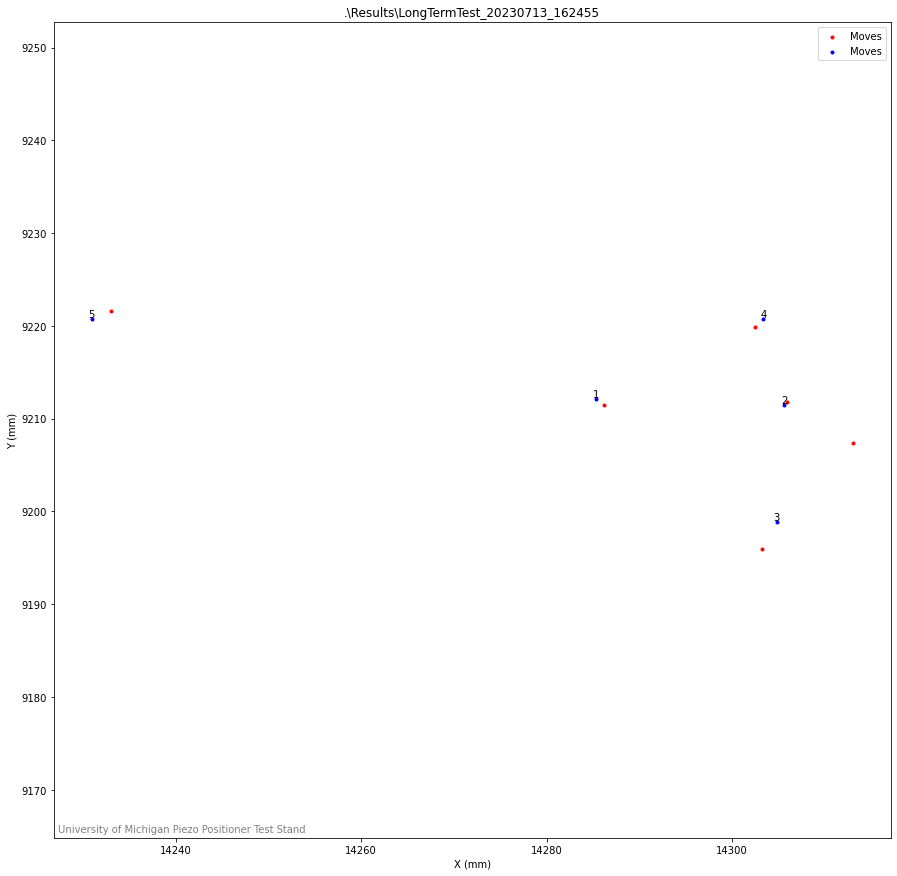

In [6]:
# Plot
steps = list(range(1,len(data['X (mm)']) +1))

figure = plt.figure(figsize=(15, 15))
ax = figure.add_subplot(111)
plt.scatter(start['X (mm)'], start['Y (mm)'],color='red',label="Moves",marker='.')
plt.scatter(end['X (mm)'], end['Y (mm)'],color='blue',label="Moves",marker='.')

for (xi, yi, i) in zip(end['X (mm)'], end['Y (mm)'],steps):
    plt.text(xi, yi, i, va='bottom', ha='center')
    
circle_x = cc.circle['circle_x']*1000 
circle_y = cc.circle['circle_y']*1000    
circle_r = cc.circle['circle_r']*1000
circle1 = plt.Circle( (circle_x, circle_y ), circle_r , fill = False )
circle2 = plt.Circle( (circle_x, circle_y ), 250 , fill = False, color = 'r', linestyle = '--')
ax.add_artist( circle1 )
ax.add_artist( circle2 )

    
ab = AnchoredText("University of Michigan Piezo Positioner Test Stand", loc="lower left", frameon=False, borderpad=0, prop=dict(alpha=0.5), )
ab.set_zorder(0)
ax.add_artist(ab)

plt.title(folder)
plt.axis('equal')
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.legend(loc='upper right')
plt.show()

In [7]:
endx = end['X (mm)'].tolist()
endy = end['Y (mm)'].tolist()
startx = start['X (mm)'].tolist()
starty = start['Y (mm)'].tolist()

In [8]:
xdiffs = np.subtract(endx, startx)
xdiffs = list(xdiffs)

ydiffs = np.subtract(endy, starty)
ydiffs = list(ydiffs)

ValueError: operands could not be broadcast together with shapes (5,) (6,) 

In [ ]:
print(xdiffs)

In [ ]:
print(ydiffs)

In [ ]:
plt.plot(xdiffs)

In [ ]:
plt.plot(ydiffs)

In [ ]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

negxdiffs = xdiffs[0::4]
posxdiffs = xdiffs[1::4]
negydiffs = ydiffs[2::4]
posydiffs = ydiffs[3::4]

In [ ]:
posxavg = moving_average(posxdiffs,10)
negxavg = moving_average(negxdiffs,10)
posyavg = moving_average(posydiffs,10)
negyavg = moving_average(negydiffs,10)

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].plot(posxdiffs,color='skyblue')
axs[0, 0].plot(posxavg)
axs[0, 0].set_title('Pos X')

axs[0, 1].plot(negxdiffs,color='skyblue')
axs[0, 1].plot(negxavg)
axs[0, 1].set_title('Neg X')

axs[1, 0].plot(posydiffs,color='skyblue')
axs[1, 0].plot(posyavg)
axs[1, 0].set_title('Pos Y')

axs[1, 1].plot(negydiffs,color='skyblue')
axs[1, 1].plot(negyavg)
axs[1, 1].set_title('Neg Y')

for ax in axs.flat:
    ax.set(xlabel='Move #', ylabel='Distance moved (um)')

In [ ]:
#when difff voltages, use this instead:
negxdiffs1 = xdiffs[0::12]
posxdiffs1 = xdiffs[1::12]
negydiffs1 = ydiffs[2::12]
posydiffs1 = ydiffs[3::12]
negxdiffs15 = xdiffs[4::12]
posxdiffs15 = xdiffs[5::12]
negydiffs15 = ydiffs[6::12]
posydiffs15 = ydiffs[7::12]
negxdiffs2 = xdiffs[8::12]
posxdiffs2 = xdiffs[9::12]
negydiffs2 = ydiffs[10::12]
posydiffs2 = ydiffs[11::12]

In [ ]:
posxavg1 = moving_average(posxdiffs1,10)
negxavg1 = moving_average(negxdiffs1,10)
posyavg1 = moving_average(posydiffs1,10)
negyavg1 = moving_average(negydiffs1,10)
posxavg15 = moving_average(posxdiffs15,10)
negxavg15 = moving_average(negxdiffs15,10)
posyavg15 = moving_average(posydiffs15,10)
negyavg15 = moving_average(negydiffs15,10)
posxavg2 = moving_average(posxdiffs2,10)
negxavg2 = moving_average(negxdiffs2,10)
posyavg2 = moving_average(posydiffs2,10)
negyavg2 = moving_average(negydiffs2,10)

In [ ]:
x = [1,1.5,2]
y = [np.average(posxavg1),np.average(posxavg15),np.average(posxavg2)]

m,b = np.polyfit(x, y, 1)
print('Pos X slope:',m)
print('Pos X intercept:',b)

y = [np.average(negxavg1),np.average(negxavg15),np.average(negxavg2)]

m,b = np.polyfit(x, y, 1)
print('Neg X slope:',m)
print('Neg X intercept:',b)

y = [np.average(posyavg1),np.average(posyavg15),np.average(posyavg2)]

m,b = np.polyfit(x, y, 1)
print('Pos Y slope:',m)
print('Pos Y intercept:',b)

y = [np.average(negyavg1),np.average(negyavg15),np.average(negyavg2)]

m,b = np.polyfit(x, y, 1)
print('Neg Y slope:',m)
print('Neg Y intercept:',b)

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].plot(posxdiffs1,color='skyblue')
axs[0, 0].plot(posxavg1)
axs[0, 0].set_title('Pos X (1V)')

axs[0, 1].plot(negxdiffs1,color='skyblue')
axs[0, 1].plot(negxavg1)
axs[0, 1].set_title('Neg X (1V)')

axs[1, 0].plot(posydiffs1,color='skyblue')
axs[1, 0].plot(posyavg1)
axs[1, 0].set_title('Pos Y (1V)')

axs[1, 1].plot(negydiffs1,color='skyblue')
axs[1, 1].plot(negyavg1)
axs[1, 1].set_title('Neg Y (1V)')

for ax in axs.flat:
    ax.set(xlabel='Move #', ylabel='Distance moved (um)')

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].plot(posxdiffs15,color='skyblue')
axs[0, 0].plot(posxavg15)
axs[0, 0].set_title('Pos X (1.5V)')

axs[0, 1].plot(negxdiffs15,color='skyblue')
axs[0, 1].plot(negxavg15)
axs[0, 1].set_title('Neg X (1.5V)')

axs[1, 0].plot(posydiffs15,color='skyblue')
axs[1, 0].plot(posyavg15)
axs[1, 0].set_title('Pos Y (1.5V)')

axs[1, 1].plot(negydiffs15,color='skyblue')
axs[1, 1].plot(negyavg15)
axs[1, 1].set_title('Neg Y (1.5V)')

for ax in axs.flat:
    ax.set(xlabel='Move #', ylabel='Distance moved (um)')

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].plot(posxdiffs2,color='skyblue')
axs[0, 0].plot(posxavg2)
axs[0, 0].set_title('Pos X (2V)')

axs[0, 1].plot(negxdiffs2,color='skyblue')
axs[0, 1].plot(negxavg2)
axs[0, 1].set_title('Neg X (2V)')

axs[1, 0].plot(posydiffs2,color='skyblue')
axs[1, 0].plot(posyavg2)
axs[1, 0].set_title('Pos Y (2V)')

axs[1, 1].plot(negydiffs2,color='skyblue')
axs[1, 1].plot(negyavg2)
axs[1, 1].set_title('Neg Y (2V)')

for ax in axs.flat:
    ax.set(xlabel='Move #', ylabel='Distance moved (um)')